# Preço Médio de Carros No Brasil

O conjunto de dados trata dos preços médios de carros usados ​​no Brasil e contém dados que ajudam a identificar como fatores como tipo de combustível, tamanho do motor, tipo de marcha, marca e modelo influenciam os preços médios dos carros usados.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')

##Importação e Visualização dos Dados

In [87]:
df = pd.read_csv ('/content/fipe_2022.csv')
df.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
0,2022,January,038001-6,vwmrywl5qs,Acura,NSX 3.0,Gasoline,manual,3.0,1995,43779.0,28
1,2022,January,038001-6,t9mt723qhz,Acura,NSX 3.0,Gasoline,manual,3.0,1994,42244.0,29
2,2022,January,038001-6,tr5wv4z21g,Acura,NSX 3.0,Gasoline,manual,3.0,1993,40841.0,30
3,2022,January,038001-6,s2xxsjz3mt,Acura,NSX 3.0,Gasoline,manual,3.0,1992,39028.0,31
4,2022,January,038001-6,rtm9gj7zk8,Acura,NSX 3.0,Gasoline,manual,3.0,1991,35678.0,32


In [88]:
df.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
age_years             0
dtype: int64

O resultado mostra que não há valores nulos no conjunto de dados

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290275 entries, 0 to 290274
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   year_of_reference   290275 non-null  int64  
 1   month_of_reference  290275 non-null  object 
 2   fipe_code           290275 non-null  object 
 3   authentication      290275 non-null  object 
 4   brand               290275 non-null  object 
 5   model               290275 non-null  object 
 6   fuel                290275 non-null  object 
 7   gear                290275 non-null  object 
 8   engine_size         290275 non-null  float64
 9   year_model          290275 non-null  int64  
 10  avg_price_brl       290275 non-null  float64
 11  age_years           290275 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 26.6+ MB


In [90]:
df.describe(include='all').round(0)

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl,age_years
count,290275.0,290275,290275,290275,290275,290275,290275,290275,290275.0,290275.0,290275.0,290275.0
unique,NaN,12,5903,290273,86,6064,3,2,NaN,NaN,NaN,NaN
top,NaN,November,039001-1,3r6c277cnqcb,GM - Chevrolet,Buggy/M-8/M-8 Long 1.6,Gasoline,manual,NaN,NaN,NaN,NaN
freq,NaN,24366,443,2,28179,443,238774,210291,NaN,NaN,NaN,NaN
mean,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2009.0,122087.0,14.0
std,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,9.0,321914.0,9.0
min,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1985.0,1831.0,0.0
25%,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2001.0,21875.0,7.0
50%,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2010.0,46836.0,13.0
75%,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2016.0,106165.0,22.0


In [91]:
print("O número de linhas e o número de colunas são ", df.shape)

O número de linhas e o número de colunas são  (290275, 12)


In [92]:
df.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl', 'age_years'],
      dtype='object')

In [93]:
traducoes = {
    'year_of_reference': 'AnoReferência',
    'month_of_reference': 'MesReferência',
    'fipe_code': 'CodigoFIPE',
    'authentication': 'Autenticacao',
    'brand': 'Marca',
    'model': 'Modelo',
    'fuel': 'Combustivel',
    'gear': 'Transmissao',
    'engine_size': 'TamanhoMotor',
    'year_model': 'AnoModelo',
    'avg_price_brl': 'PrecoMedio',
    'age_years': 'Idade'
}

# Renomear as colunas
df.rename(columns=traducoes, inplace=True)

# Verificar as novas colunas
print(df.columns)

Index(['AnoReferência', 'MesReferência', 'CodigoFIPE', 'Autenticacao', 'Marca',
       'Modelo', 'Combustivel', 'Transmissao', 'TamanhoMotor', 'AnoModelo',
       'PrecoMedio', 'Idade'],
      dtype='object')


In [94]:
df.drop(["CodigoFIPE", "Autenticacao"], axis=1, inplace=True)
df.columns

Index(['AnoReferência', 'MesReferência', 'Marca', 'Modelo', 'Combustivel',
       'Transmissao', 'TamanhoMotor', 'AnoModelo', 'PrecoMedio', 'Idade'],
      dtype='object')

## Analise de Dados Exploratória

#### Analisando Distribuições e Histogramas

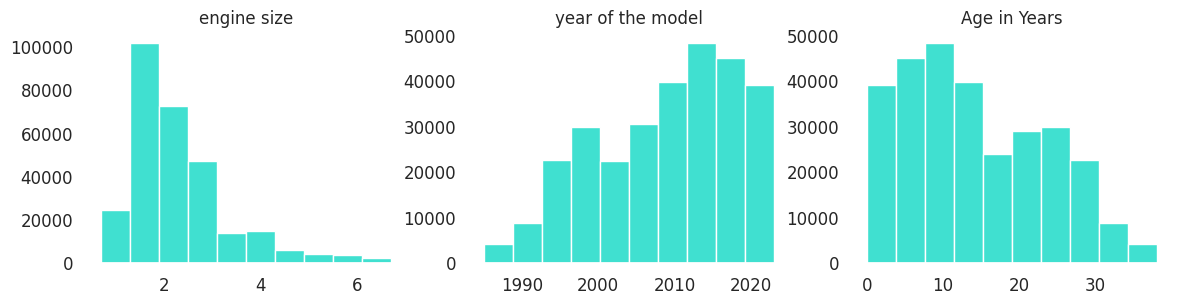

In [95]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12})
fig, axes = plt.subplots(1, 3, figsize=(14,3))
Ano_do_Modelo = df.AnoModelo.hist(ax=axes[1], color="#40E0D0", grid=False, ).set_title('year of the model')
age_years = df.Idade.hist(ax=axes[2], color="#40E0D0", grid=False).set_title('Age in Years')
engine_size = df.TamanhoMotor.hist(ax=axes[0], color="#40E0D0", grid=False).set_title('engine size')

#### Análise preços médios e idade do carro



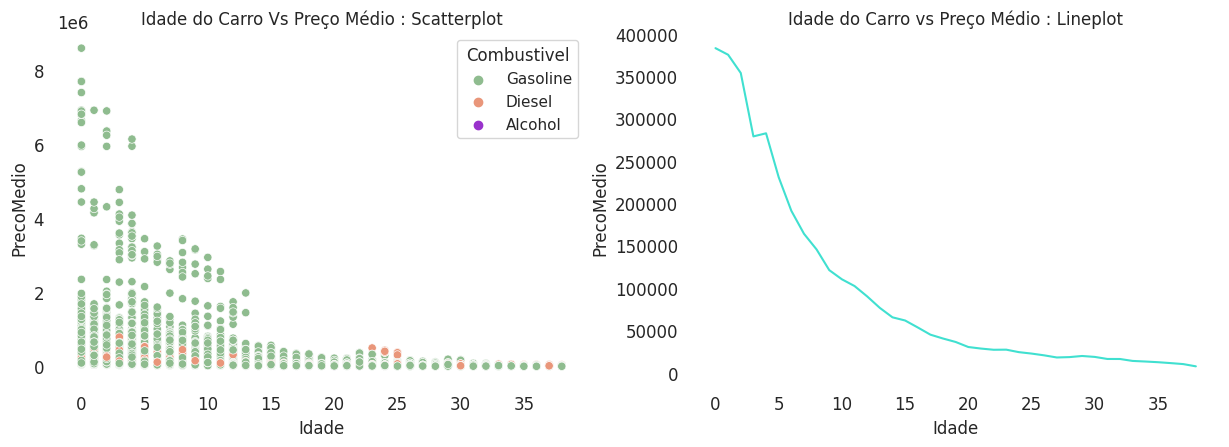

In [110]:
# Subamostragem aleatória para reduzir o número de pontos
df_subsampled = df.sample(frac=0.1, random_state=42)  # Ajuste o valor de frac conforme necessário

# Criar o gráfico scatterplot com a subamostra
plt.figure(figsize=(15, 10))

# Scatterplot com Subamostra
plt.subplot(2, 2, 1)
plt.title('Idade do Carro Vs Preço Médio : Scatterplot', fontdict={'fontsize': 12})
sns.scatterplot(x='Idade', y='PrecoMedio', hue='Combustivel', palette=('#8FBC8F', '#E9967A', '#9932CC'), data=df_subsampled)

# Lineplot (Assumindo que você quer manter o lineplot)
plt.subplot(2, 2, 2)
plt.title('Idade do Carro vs Preço Médio : Lineplot', fontdict={'fontsize': 12})
sns.lineplot(data=df, x="Idade", y="PrecoMedio", color="#40E0D0", ci=None)

# Salvar o gráfico como uma imagem PNG
plt.savefig('scatterplot.png', dpi=300, bbox_inches='tight')

# Mostrar o gráfico
plt.show()

#### Análise preços médios versus tamanho do motor

<Axes: title={'center': 'engine_size vs Avg Price : Lineplot'}, xlabel='TamanhoMotor', ylabel='PrecoMedio'>

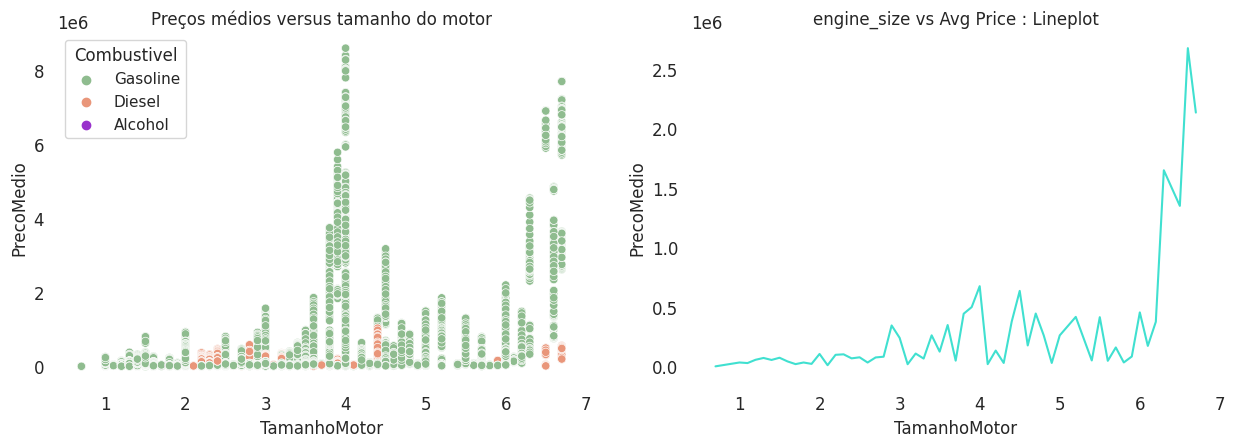

In [98]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12})

plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.title('Preços médios versus tamanho do motor', fontdict={'fontsize':12})
sns.scatterplot(x='TamanhoMotor', y='PrecoMedio', hue='Combustivel', palette=('#8FBC8F','#E9967A','#9932CC'), data=df)

plt.subplot(2,2,2)
plt.title('engine_size vs Avg Price : Lineplot', fontdict={'fontsize':12})
sns.lineplot(data=df, x="TamanhoMotor", y="PrecoMedio", color="#40E0D0", ci=None)

#### Carros vendidos por Tipo de de Combustível

[Text(0.5, 1.0, 'Carros vendidos por Tipo de de Combustível (%)')]

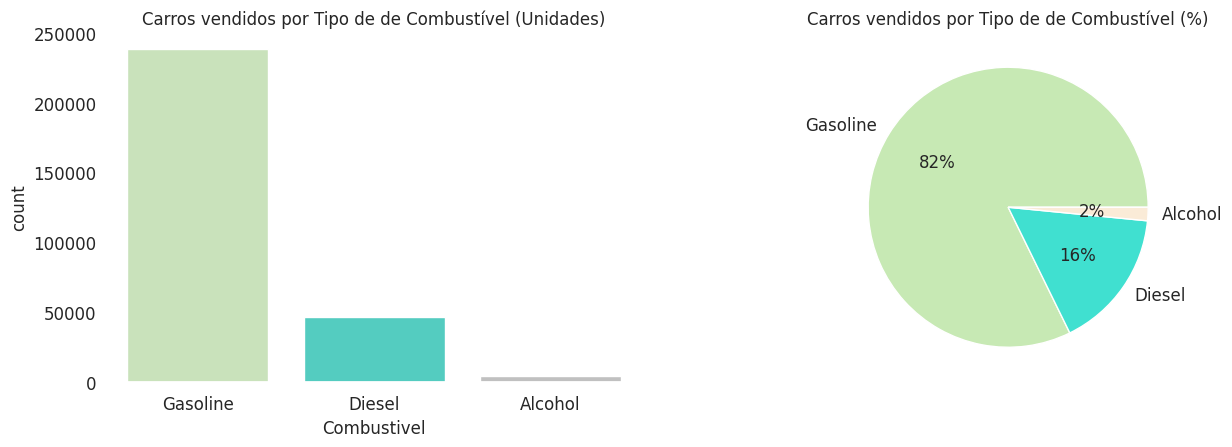

In [99]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x="Combustivel", palette=('#c7e9b4', '#40E0D0', '#C0C0C0'), data=df).set(title='Carros vendidos por Tipo de de Combustível (Unidades)')

plt.subplot(2,2,2)
colors = ({'#c7e9b4': '#c7e9b4', '#40E0D0':'#40E0D0', '#FAEBD7': '#FAEBD7'})
df['Combustivel'].value_counts().plot(kind='pie', colors=colors.values(), legend=None, ylabel='', autopct='%1.0f%%').set(title='Carros vendidos por Tipo de de Combustível (%)')

#### Mais vendidos por Modelo

array([<Axes: title={'center': 'Modelo'}, xlabel='Marca'>], dtype=object)

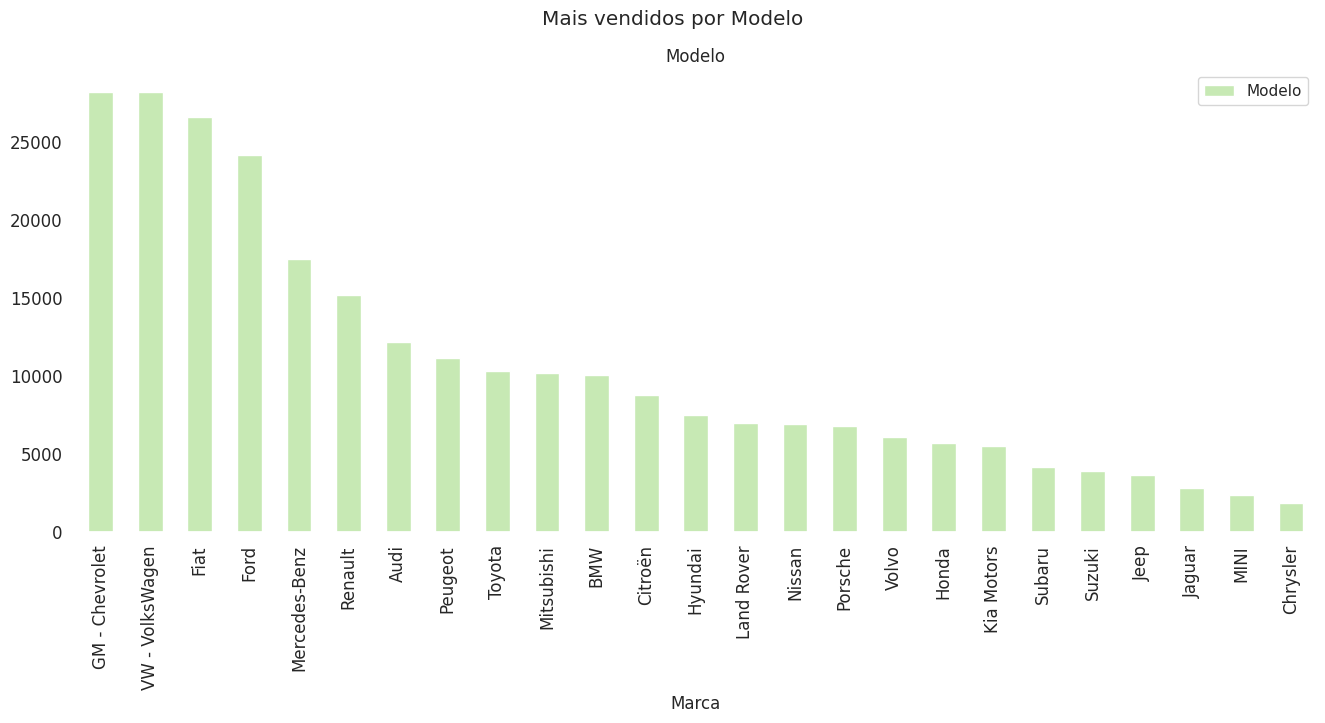

In [100]:

top_brands_mdl = df[['Marca', 'Modelo']].groupby('Marca').count().sort_values(by="Modelo", ascending=False).head(25)
top_brands_mdl

top_brands_mdl.plot(kind='bar', subplots=True, fontsize = 12, color= "#c7e9b4", figsize=(16,6), title='Mais vendidos por Modelo ')


#### Mais vendido por preço

<Axes: title={'center': 'Top 25 brands by Avg Price'}, xlabel='Marca'>

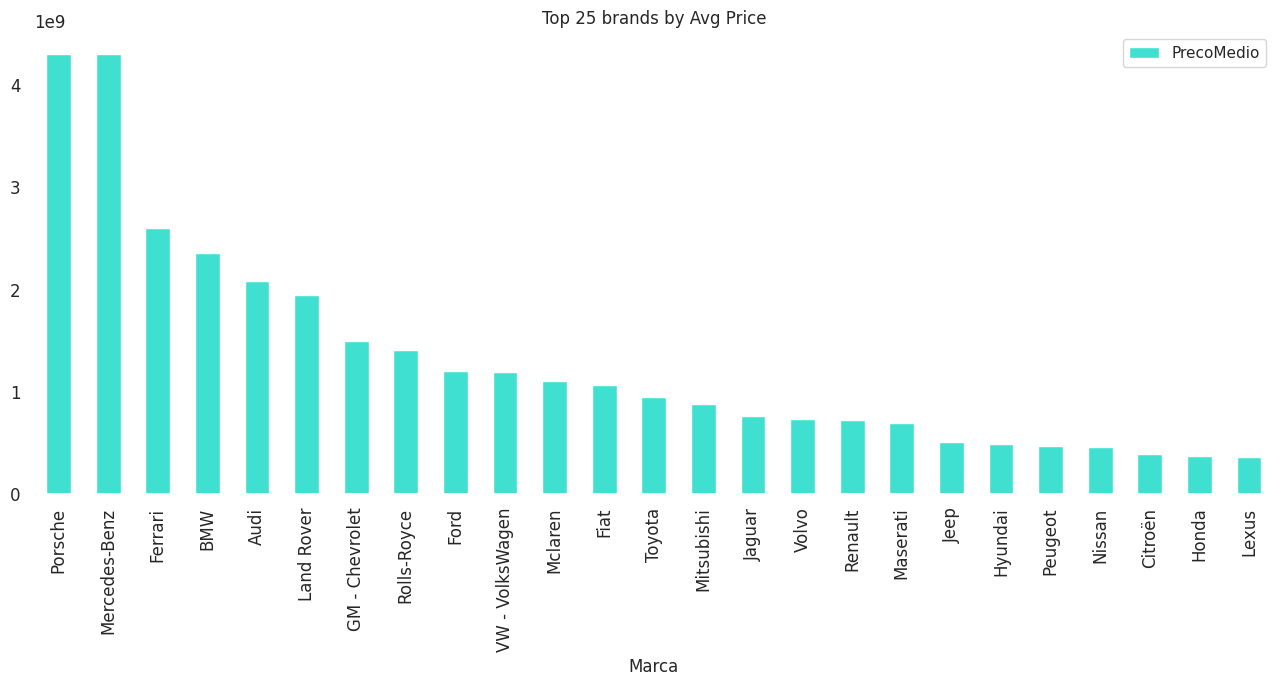

In [101]:

top_brands_avgpr = df[['Marca', 'PrecoMedio']].groupby('Marca').sum().sort_values(by="PrecoMedio", ascending=False).head(25)
top_brands_avgpr
top_brands_avgpr.plot(kind='bar', figsize=(16,6), color='#40E0D0', title='Top 25 brands by Avg Price')

## Modelagem de Dados

<Axes: title={'center': 'PrecoMedio: Box & Whisker Plot'}>

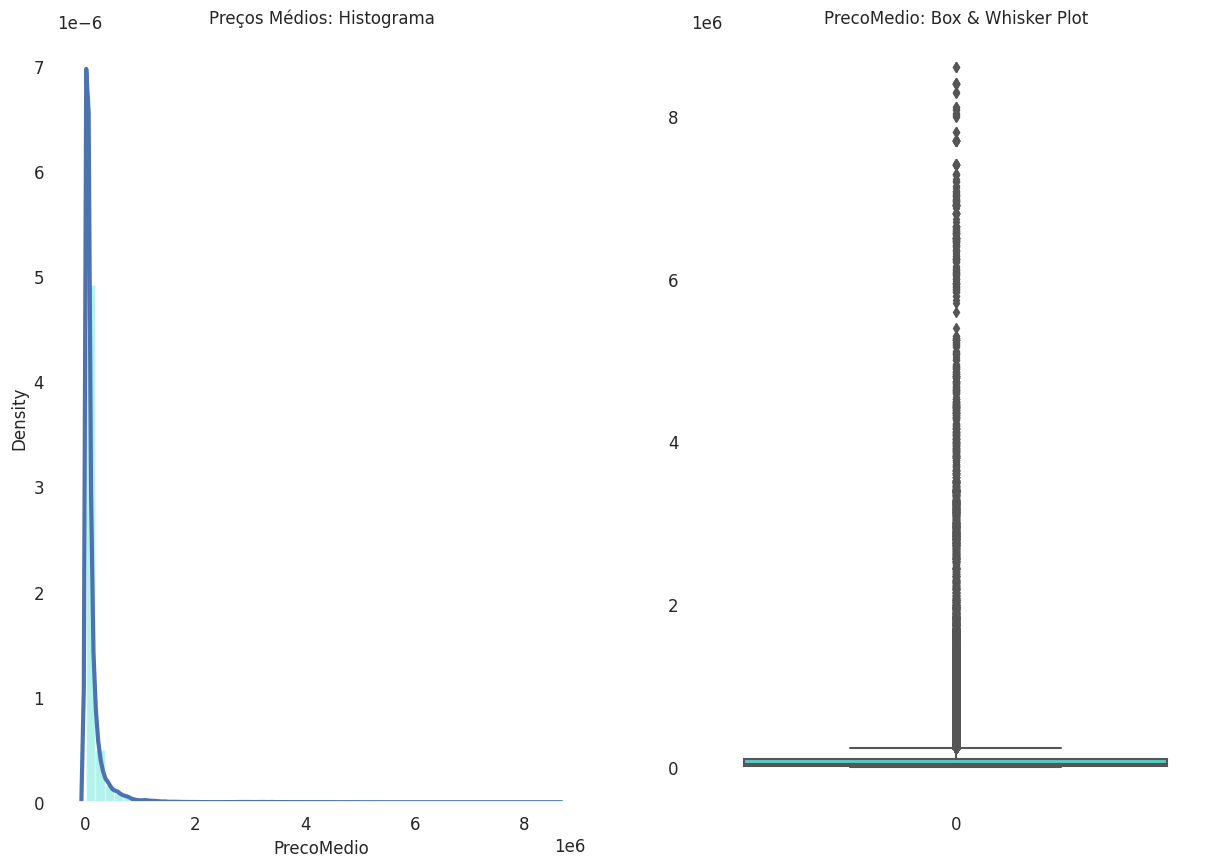

In [102]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title('Preços Médios: Histograma', fontdict={'fontsize':12})
sns.distplot(df.PrecoMedio, color="#40E0D0", kde_kws={'linewidth':3,'color':'b'})

plt.subplot(1,2,2)
plt.title('PrecoMedio: Box & Whisker Plot', fontdict={'fontsize':12})
sns.boxplot(df.PrecoMedio, color="#40E0D0")

##Concluindo

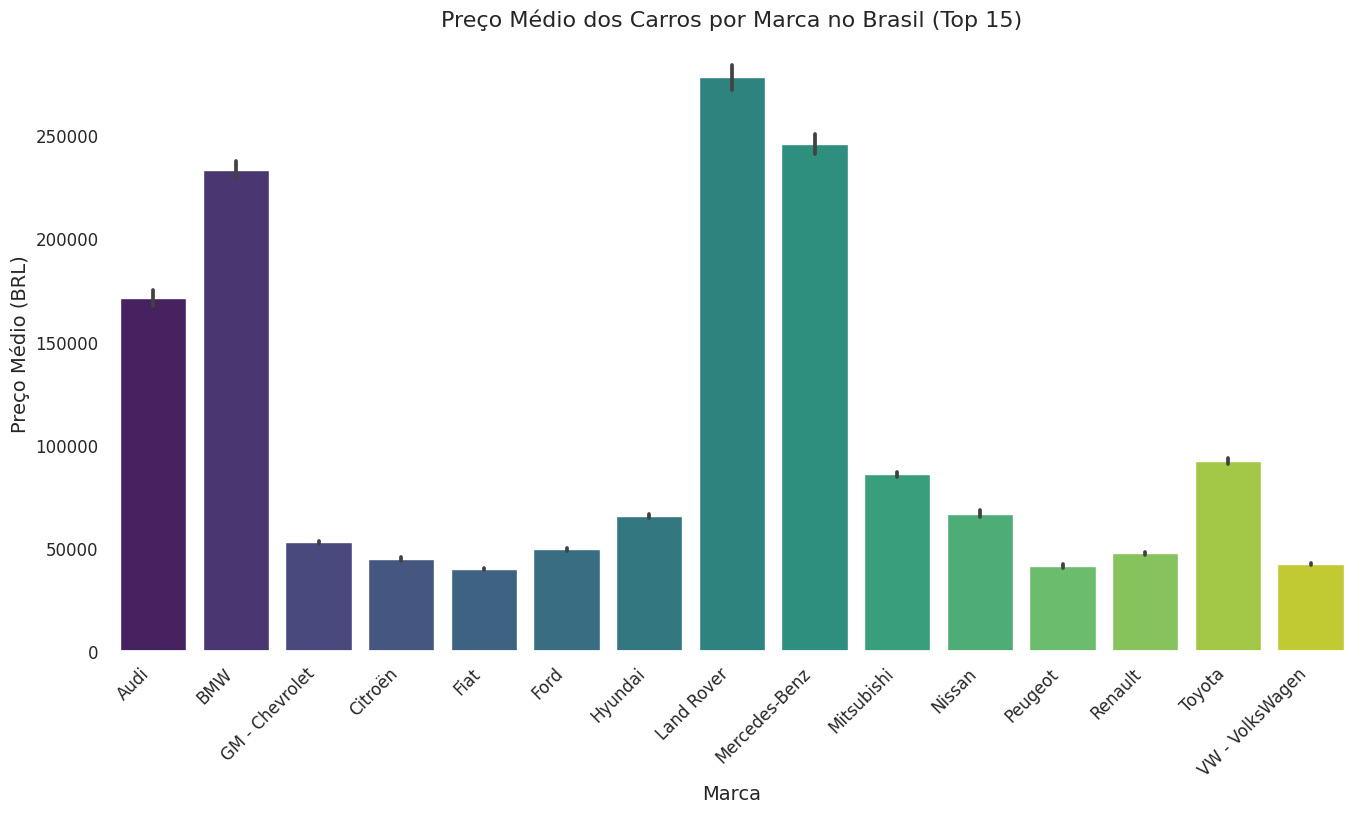

In [109]:
top_brands = df['Marca'].value_counts().head(15).index

# Criar o gráfico de barras
plt.figure(figsize=(16, 8))
sns.barplot(x='Marca', y='PrecoMedio', data=df[df['Marca'].isin(top_brands)], palette='viridis')
plt.title('Preço Médio dos Carros por Marca no Brasil (Top 15)', fontsize=16)
plt.xlabel('Marca', fontsize=14)
plt.ylabel('Preço Médio (BRL)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)

# Obter a figura atual
fig = plt.gcf()

# Salvar o gráfico como uma imagem PNG
fig.savefig('barplot.png', dpi=300, bbox_inches='tight')

plt.show()
